In [1]:
import pandas as pd

cycling = pd.read_csv('./datasets/bike_rides.csv')
cycling.head()

,timestamp,power,heart-rate,cadence,speed,acceleration,slope
0,2020-08-18 14:43:19,150.0,102.0,64.0,4.325,0.0880,-0.033870
1,2020-08-18 14:43:20,161.0,103.0,64.0,4.336,0.0842,-0.033571
2,2020-08-18 14:43:21,163.0,105.0,66.0,4.409,0.0234,-0.033223
3,2020-08-18 14:43:22,156.0,106.0,66.0,4.445,0.0016,-0.032908
4,2020-08-18 14:43:23,148.0,106.0,67.0,4.441,0.1144,0.000000


In [2]:
cycling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38254 entries, 0 to 38253
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     38254 non-null  object 
 1   power         38254 non-null  float64
 2   heart-rate    38254 non-null  float64
 3   cadence       38254 non-null  float64
 4   speed         38254 non-null  float64
 5   acceleration  38254 non-null  float64
 6   slope         38254 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.0+ MB


In [3]:
cycling = pd.read_csv(
    './datasets/bike_rides.csv', index_col=0, parse_dates=True
)
cycling.index.name = ''
cycling.head()

,power,heart-rate,cadence,speed,acceleration,slope
,,,,,,
2020-08-18 14:43:19,150.0,102.0,64.0,4.325,0.0880,-0.033870
2020-08-18 14:43:20,161.0,103.0,64.0,4.336,0.0842,-0.033571
2020-08-18 14:43:21,163.0,105.0,66.0,4.409,0.0234,-0.033223
2020-08-18 14:43:22,156.0,106.0,66.0,4.445,0.0016,-0.032908
2020-08-18 14:43:23,148.0,106.0,67.0,4.441,0.1144,0.000000


In [4]:
cycling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38254 entries, 2020-08-18 14:43:19 to 2020-09-13 14:56:01
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   power         38254 non-null  float64
 1   heart-rate    38254 non-null  float64
 2   cadence       38254 non-null  float64
 3   speed         38254 non-null  float64
 4   acceleration  38254 non-null  float64
 5   slope         38254 non-null  float64
dtypes: float64(6)
memory usage: 2.0 MB


In [9]:
target_name = "power"
data, target = cycling.drop(columns=target_name), cycling[target_name]

Text(0.5, 0, 'Power (W)')

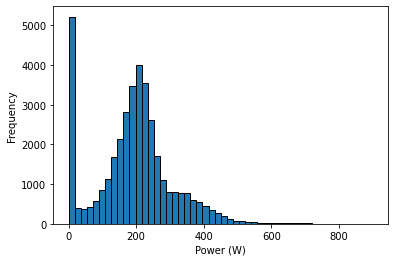

In [10]:
import matplotlib.pyplot as plt

target.plot.hist(bins=50, edgecolor='black')
plt.xlabel('Power (W)')

In [11]:
data.head()

,heart-rate,cadence,speed,acceleration,slope
,,,,,
2020-08-18 14:43:19,102.0,64.0,4.325,0.0880,-0.033870
2020-08-18 14:43:20,103.0,64.0,4.336,0.0842,-0.033571
2020-08-18 14:43:21,105.0,66.0,4.409,0.0234,-0.033223
2020-08-18 14:43:22,106.0,66.0,4.445,0.0016,-0.032908
2020-08-18 14:43:23,106.0,67.0,4.441,0.1144,0.000000


In [12]:
data.index

DatetimeIndex(['2020-08-18 14:43:19', '2020-08-18 14:43:20',
               '2020-08-18 14:43:21', '2020-08-18 14:43:22',
               '2020-08-18 14:43:23', '2020-08-18 14:43:24',
               '2020-08-18 14:43:25', '2020-08-18 14:43:26',
               '2020-08-18 14:43:27', '2020-08-18 14:43:28',
               ...
               '2020-09-13 14:55:52', '2020-09-13 14:55:53',
               '2020-09-13 14:55:54', '2020-09-13 14:55:55',
               '2020-09-13 14:55:56', '2020-09-13 14:55:57',
               '2020-09-13 14:55:58', '2020-09-13 14:55:59',
               '2020-09-13 14:56:00', '2020-09-13 14:56:01'],
              dtype='datetime64[ns]', name='', length=38254, freq=None)

In [13]:
data.index.min(), data.index.max()

(Timestamp('2020-08-18 14:43:19'), Timestamp('2020-09-13 14:56:01'))

In [14]:
data.index.normalize().nunique()

4

In [15]:
date_first_ride = '2020-08-18'
cycling_ride = cycling.loc[date_first_ride]
data_ride, target_ride = data.loc[date_first_ride], target.loc[date_first_ride]

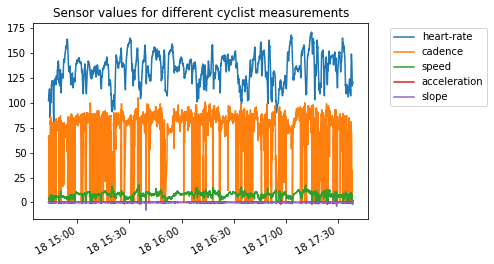

In [17]:
data_ride.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title('Sensor values for different cyclist measurements')

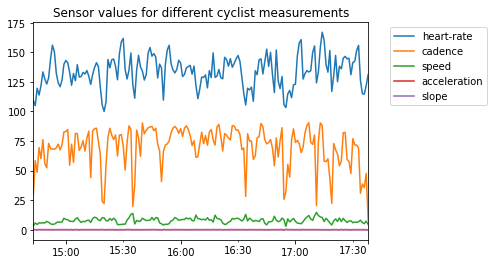

In [18]:
data_ride.resample("60S").mean().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title('Sensor values for different cyclist measurements')

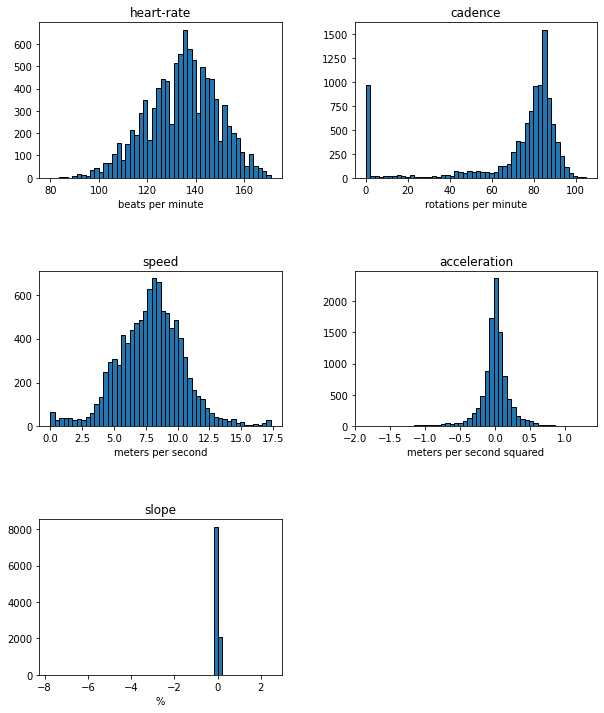

In [19]:
axs = data_ride.hist(figsize=(10, 12), bins=50, edgecolor='black', grid=False)
units = [
    "beats per minute",
    "rotations per minute",
    "meters per second",
    "meters per second squared",
    "%",
]
for unit, ax in zip(units, axs.ravel()):
    ax.set_xlabel(unit)
plt.subplots_adjust(hspace=0.6)

In [20]:
import numpy as np

rng = np.random.RandomState(0)
indices = rng.choice(np.arange(cycling_ride.shape[0]), size=500, replace=False)

In [21]:
subset = cycling_ride.iloc[indices].copy()
# Quantize the target and keep the midpoint for each interval
subset["power"] = pd.qcut(subset["power"], 6, retbins=False)
subset["power"] = subset["power"].apply(lambda x: x.mid)

In [ ]:
import seaborn as sns

_ = sns.pairplot(data=subset, hue="power", palette="viridis")